In [94]:
import torch, torchvision
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid
import ipywidgets as widgets
import numpy as np

device = torch.device("cuda")

def mnistplot(x):
    assert x.ndim in (2, 3)

    vmin = -0.4242
    vmax = 2.8215

    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy()
    else:
        x = np.array(x)

    if x.ndim == 3 and x.shape[0] == 1:
        x = x[0]

    if len(x.shape) == 2:
        plt.axis('off')
        plt.imshow(x, cmap='gray', vmin=vmin, vmax=vmax)
    elif len(x.shape) == 3:
        ncols = 4
        nrows = -(x.shape[0] // -4)

        fig = plt.figure(figsize=(4 * ncols, 4 * nrows))
        grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols))

        for ax in grid:
            ax.axis("off")

        for ax, i in enumerate(grid):
            if i >= x.shape[0]:
                break
            ax.imshow(x[i], cmap='gray', vmin=vmin, vmax=vmax)

        plt.show()

    

In [47]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,)),
])

trainset = torchvision.datasets.MNIST('~/.cache', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST('~/.cache', train=False, download=True, transform=transform)

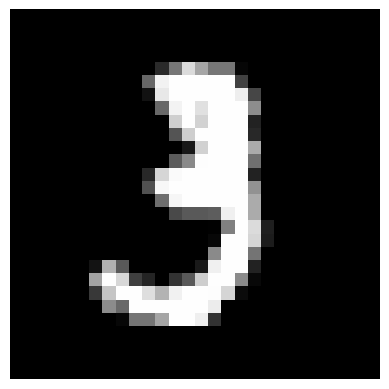

In [97]:
mnistplot(trainset[10][0][0])

In [71]:
max([torch.max(x[0]) for x in testset])

tensor(2.8215)

In [56]:
len(trainset[0][0].numpy().shape)

3

In [59]:
3 in (1,2,3)

True

In [99]:
type([x for x in (1,2,3)])

list